### General introduction for the **pyDeepP2SA**

pyDeepP2SA is an advanced particle size and shape analysis (P2SA) package that leverages the cutting-edge Segment Anything Model (SAM) developed by Facebook Inc. for highly accurate and robust object segmentation. Unlike traditional approaches that rely on manual training and old-fashioned watershed algorithms, pyDeepP2SA revolutionises the field by offering a zero-generalisation segmentation technique. With minimal manual intervention, this package delivers exceptional results and simplifies the entire analysis workflow.

The package provides a collection of functions for particle shape and size analysis, as well as particle characterisation. It offers capabilities such as generating masks for image segmentation using a self-attention-based model, visualising masks overlaid on images, saving mask properties to CSV files, plotting bounding boxes around masks based on size and circularity thresholds, analysing individual masks and their properties, calculating summary statistics and plotting box plots for mask properties, visualising particle size distribution and circularity distribution, performing line scan analysis on masks and saving the results to CSV files, and plotting segment bounding boxes based on segment types. Additionally, it includes functions for plotting particle size distribution and box plots specifically for cenospheres and solid spheres. This package provides a comprehensive toolkit for analysing and characterising particles in scientific images.

The following example code sheet will provide a comphrehensive workflow for utilising the package.

### Basic particle shape and size analysis

In [ ]:
# Installing necessary packages (i.e., pyDeepP2SA and SAM) for the workflow

!pip install pyDeepP2SA
!pip install 'git+https://github.com/facebookresearch/segment-anything.git'

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-ku_74g6m
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-ku_74g6m
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36589 sha256=dca3a9976a2746e0ccecfbb9657d1d28f49d549dcec2c7ec48a1356897a25753
  Stored in directory: /tmp/pip-ephem-wheel-cache-18teieoc/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything


In [ ]:
# Importing the opencv to read the images and pyDeepP2SA for the analysis

import cv2
import pyDeepP2SA as dp

In [ ]:
# Importing the secondary electron image as image, back scattered electron image as image_bse, and the segment anything model check point as sam_checkpoint.
# SAM checkpoints needs to be downloaded and saved in local for the analysis.
# you can download the checkpoints from here: https://github.com/facebookresearch/segment-anything#model-checkpoints

image = cv2.imread('link to the directory containing secondary electron image')
image_bse = cv2.imread('link to the directory containing back scattered electron image or eds map')
sam_checkpoint = "link to the directory containing SAM check point"

In [ ]:
# As the first step, you need to create the masks from your imported secondary electron image.
# Here the parameters are set to default for the SAM, but refer the pyDeepP2SA documentation (https://github.com/BrinthanK/pyDeepP2SA/blob/main/README.md)for changing the parameters to optimise the mask generation.

masks=dp.generate_masks(image,sam_checkpoint)

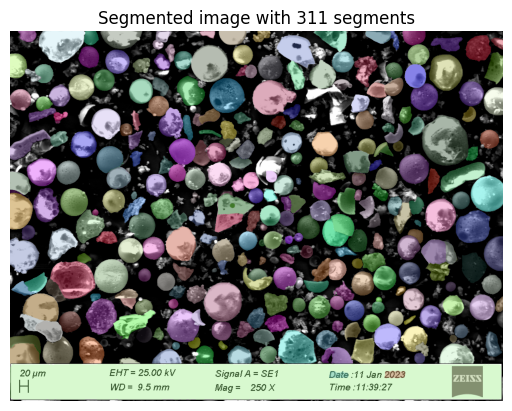

In [ ]:
# Visualise the segmented masks

dp.visualise_masks(image, masks)

In [ ]:
# To save the mask details you need to provide the file location to save the mask details and the conversion factor for pixels to microns.
# To find the pixel to micron conversion factor you may use open source applications like ImageJ or even you can crop using the python code to find the number of pixels using the bottom information bar of the image

csv_directory = "segments.csv"
pixel_to_micron = 1

dp.save_masks_to_csv(masks, csv_directory, pixel_to_micron)

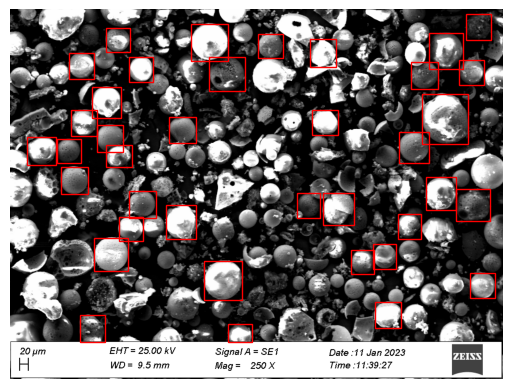

In [ ]:
# To identify and annotate the spheres with diameter and circularity thresholds you may use plot_diameters function.
# Length units should be given in microns

diameter_threshold = 50
circularity_threshold = 0.85
dp.plot_diameters(image, masks, diameter_threshold, circularity_threshold, pixel_to_micron)

In [ ]:
# To individually annotate the selected spheres ind_mask function can be used.
# The figures will also provide basic physical measurements of every sphere selected

dp.ind_mask(masks, diameter_threshold, circularity_threshold, pixel_to_micron, image)

In [ ]:
# This function reads the CSV file with region properties and returns a summary of the properties for the masks that meet the diameter and circularity thresholds.
# Always you have the flexibility to change the thresholds of diameter and circularity to assess different conditions.

dp.stat_sum(diameter_threshold, circularity_threshold, csv_directory)

,area,perimeter,diameter,circularity
count,38.000000,38.000000,38.000000,38.000000
mean,2772.368421,192.962193,60.798370,0.903316
std,1206.145445,37.455117,11.751375,0.024770
min,1503.000000,148.325902,50.238254,0.852731
25%,2056.500000,167.428193,51.902425,0.889225
50%,2301.500000,180.438600,56.510377,0.910862
75%,3271.000000,214.651804,67.600777,0.917205
max,7860.000000,332.735065,105.874926,0.938235


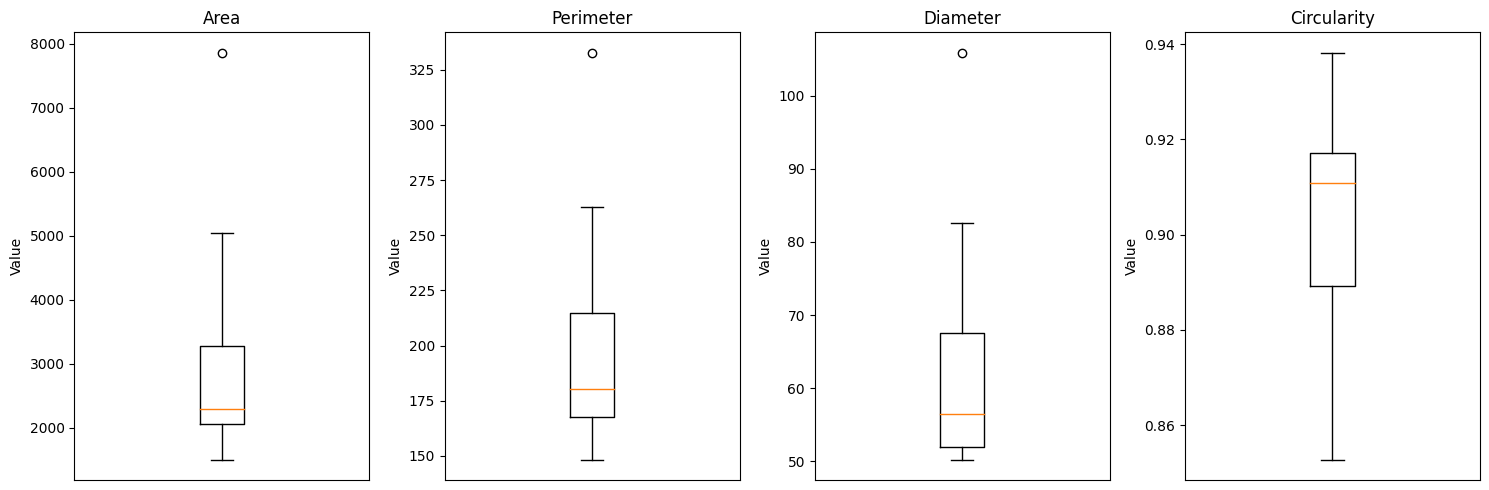

In [ ]:
# This function reads the CSV file and plots boxplots for the area, perimeter, diameter, and circularity of the masks that meet the diameter and circularity thresholds.

dp.plot_boxplots(diameter_threshold, circularity_threshold, csv_directory)

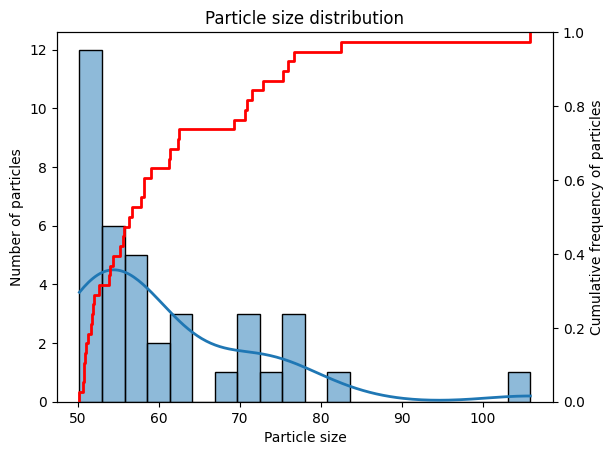

In [ ]:
# This function reads the CSV file and plots the particle size distribution (PSD) using a histogram and cumulative frequency curve.
# Additional argument num_bins will define the number of bins that should be used in plotting the PSD bars.

num_bins = 20

dp.plot_psd(diameter_threshold, circularity_threshold, num_bins, csv_directory)

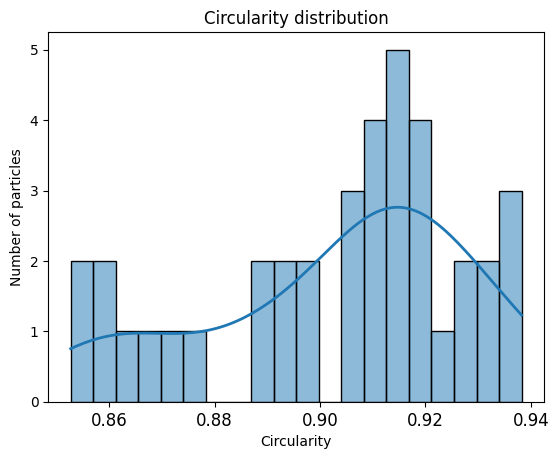

In [ ]:
# This function reads the CSV file and plots the circularity distribution using a histogram.

dp.plot_cir(diameter_threshold, circularity_threshold, num_bins, csv_directory)

### Characterisation workflow for solid and cenosphere

In [ ]:
# The parameters the characterisation assessment for solid and hollow spheres
# You may continue to use the previous threshold value for the circularity here or choose a new threshold
# It is important to provide another csv file location for characterisation study
# By providing line_distance_man a value (in microns) you can determine the line scan step size

circularity_threshold = 0.85
pixel_to_micron = 1
min_area = 50
csv_file = 'results.csv'
line_distance_man = 50

dp.line_scan(image, image_bse, masks, circularity_threshold, min_area, csv_file, pixel_to_micron, line_distance_man)

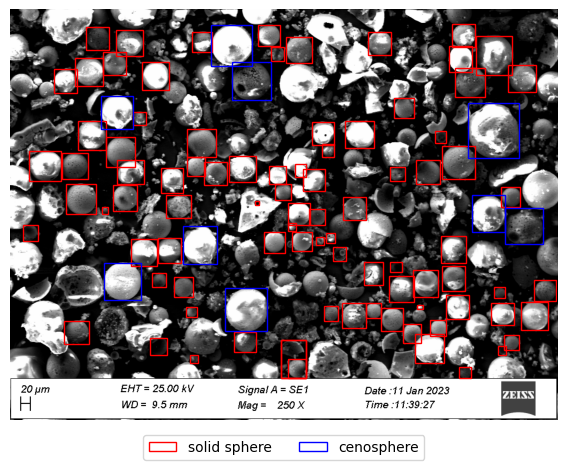

In [ ]:
# You may ask to plot your choice of sphere catergory using the segment_types list

segment_types = ['solid sphere','cenosphere']
dp.plot_segment_bounding_boxes(csv_file, segment_types,image)

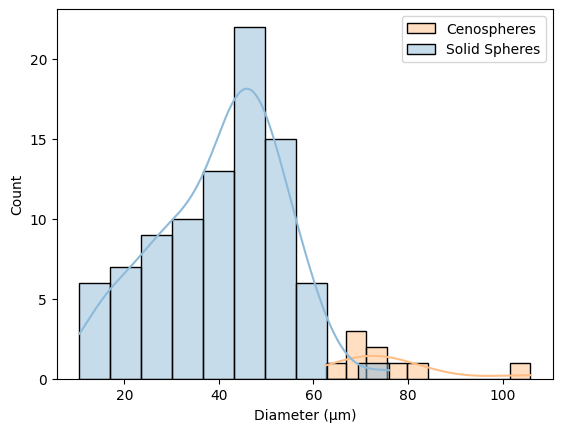

In [ ]:
# This function will provide PSD curves for solid sphere and cenosphere

dp.psd_spheres(csv_file)

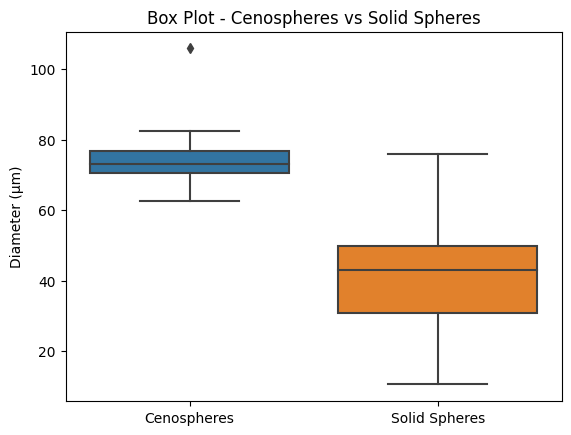

In [ ]:
# # This function will provide box plot statistics for solid sphere and cenosphere


dp.box_plots_spheres(csv_file)